# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime=starttime, endtime=endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()

In [4]:
# # Add noise to data:
# for i in range(len(st)):
#     st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

In [9]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, nonlinloc_event_path=nonlinloc_event_path) #(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.3 #0.1
splitting_event.win_S_pick_tolerance = 0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.2 #0.2
splitting_event.rotate_step_deg = 1.0 #2.5
splitting_event.max_t_shift_s = 0.12
splitting_event.n_win = 10 #5 #10
# splitting_event.perform_sp
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV_and_XC") #(coord_system="LQT") #(coord_system="ZNE")


No S phase pick for station: ST06 therefore skipping this station.
No S phase pick for station: ST07 therefore skipping this station.
No S phase pick for station: ST08 therefore skipping this station.
No S phase pick for station: ST09 therefore skipping this station.
No S phase pick for station: ST10 therefore skipping this station.


,station,phi,phi_err,dt,dt_err,Q_w
0,ST01,71.0,0.5,0.048,0.00175,0.000000
0,ST02,89.0,0.5,0.042,0.04525,0.000000
0,ST03,-66.0,0.5,0.020,0.00200,0.000000
0,ST04,77.0,0.5,0.044,0.00100,0.000000
0,ST05,-84.0,1.5,0.004,0.04525,0.385313


<IPython.core.display.Javascript object>


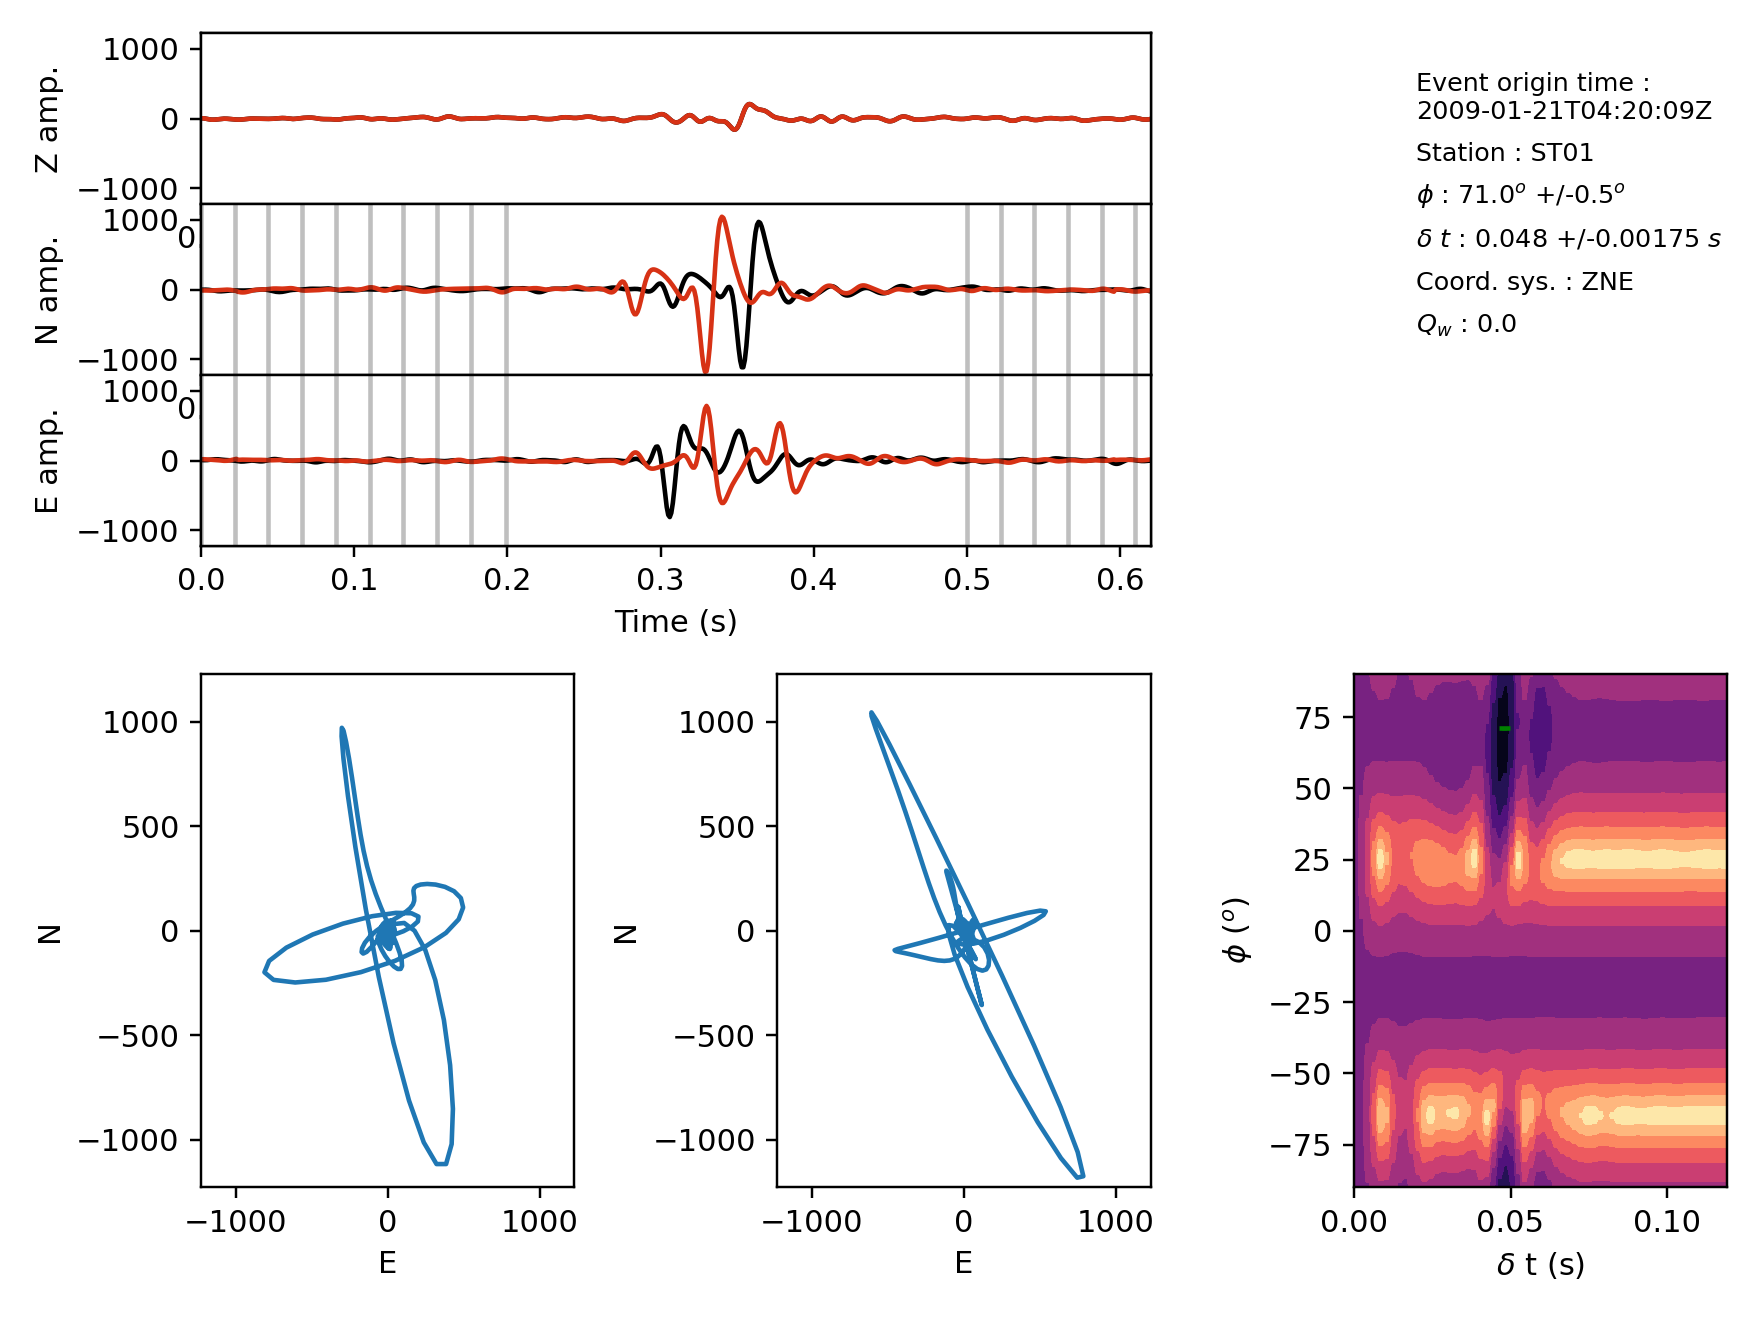

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:926: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if outdir:


<IPython.core.display.Javascript object>


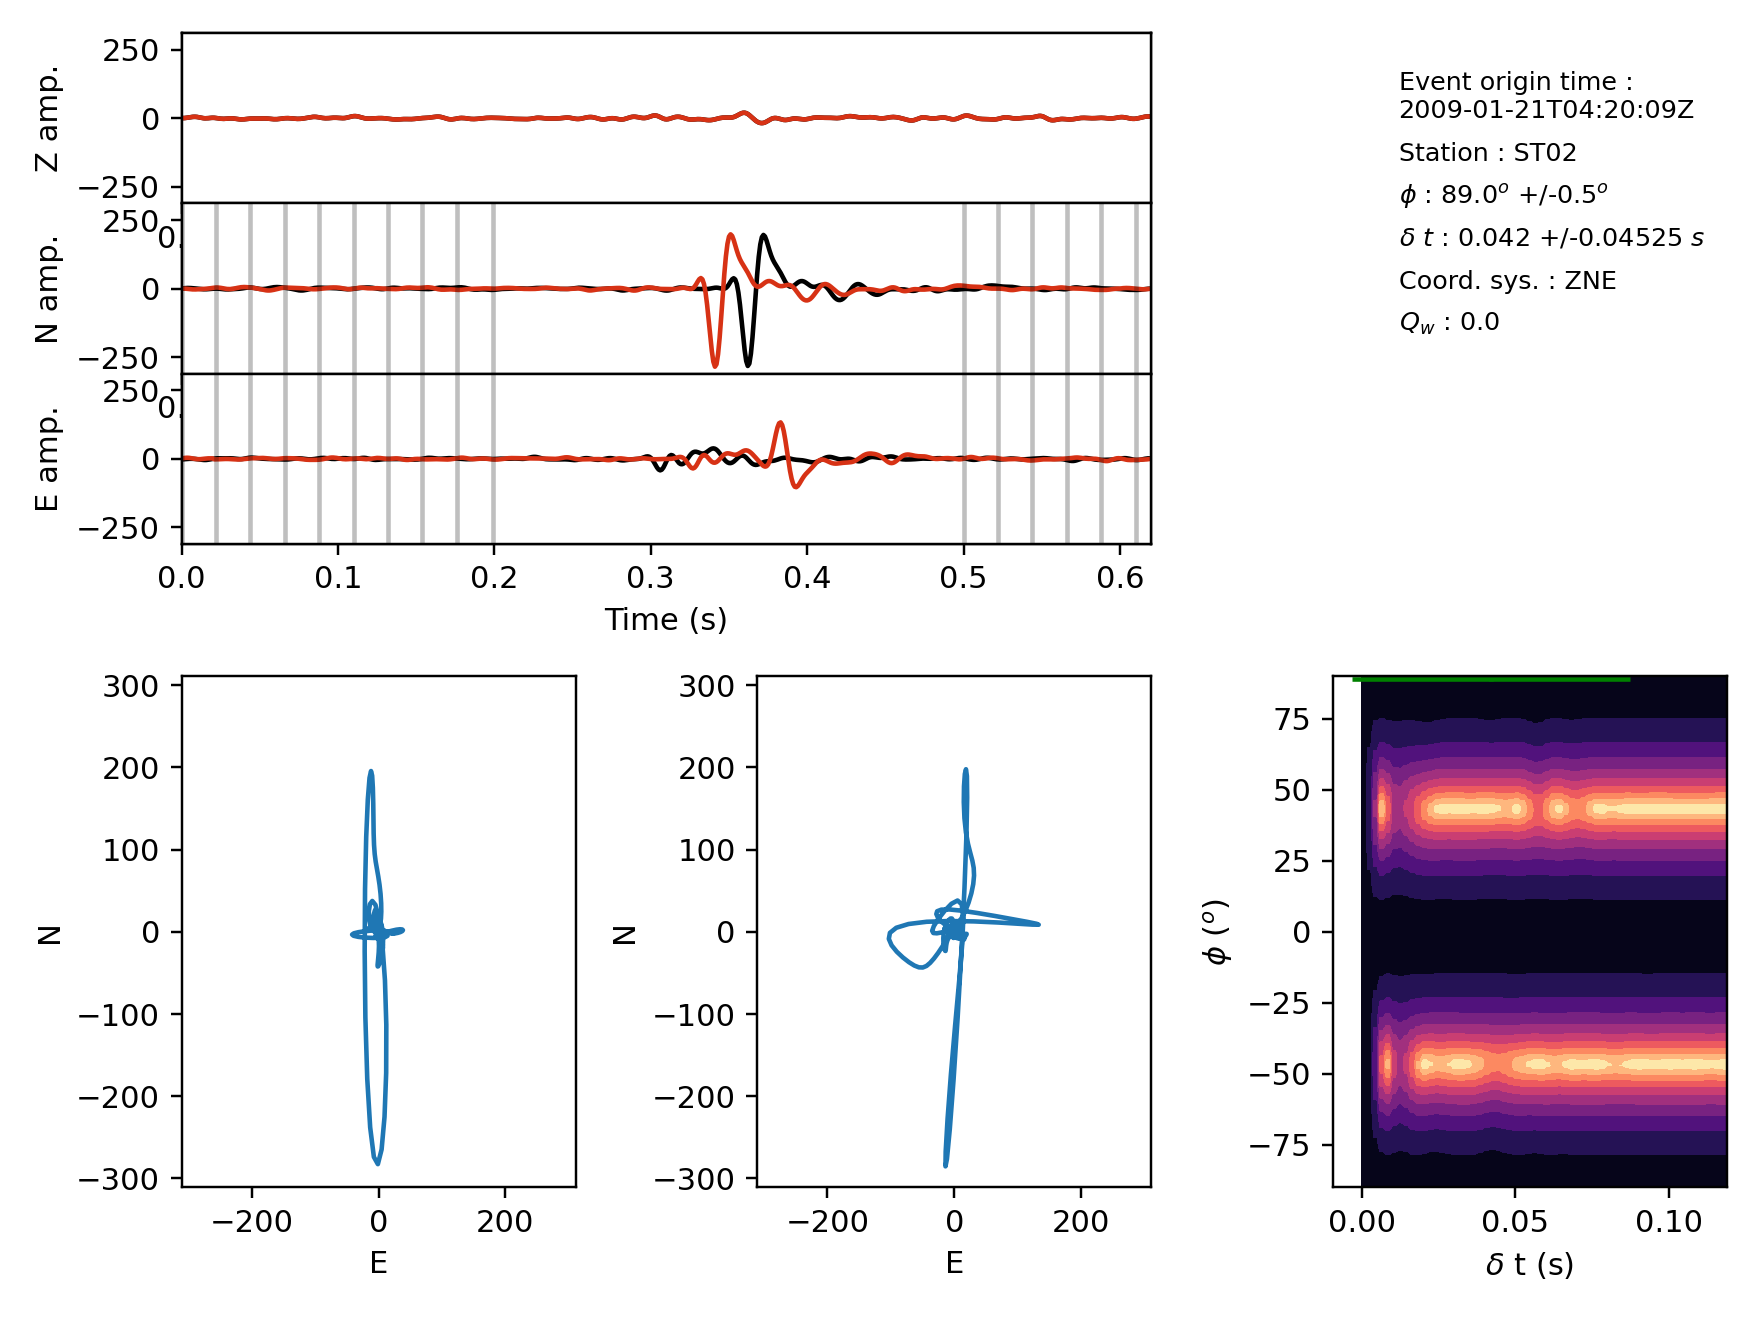

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:926: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if outdir:


<IPython.core.display.Javascript object>


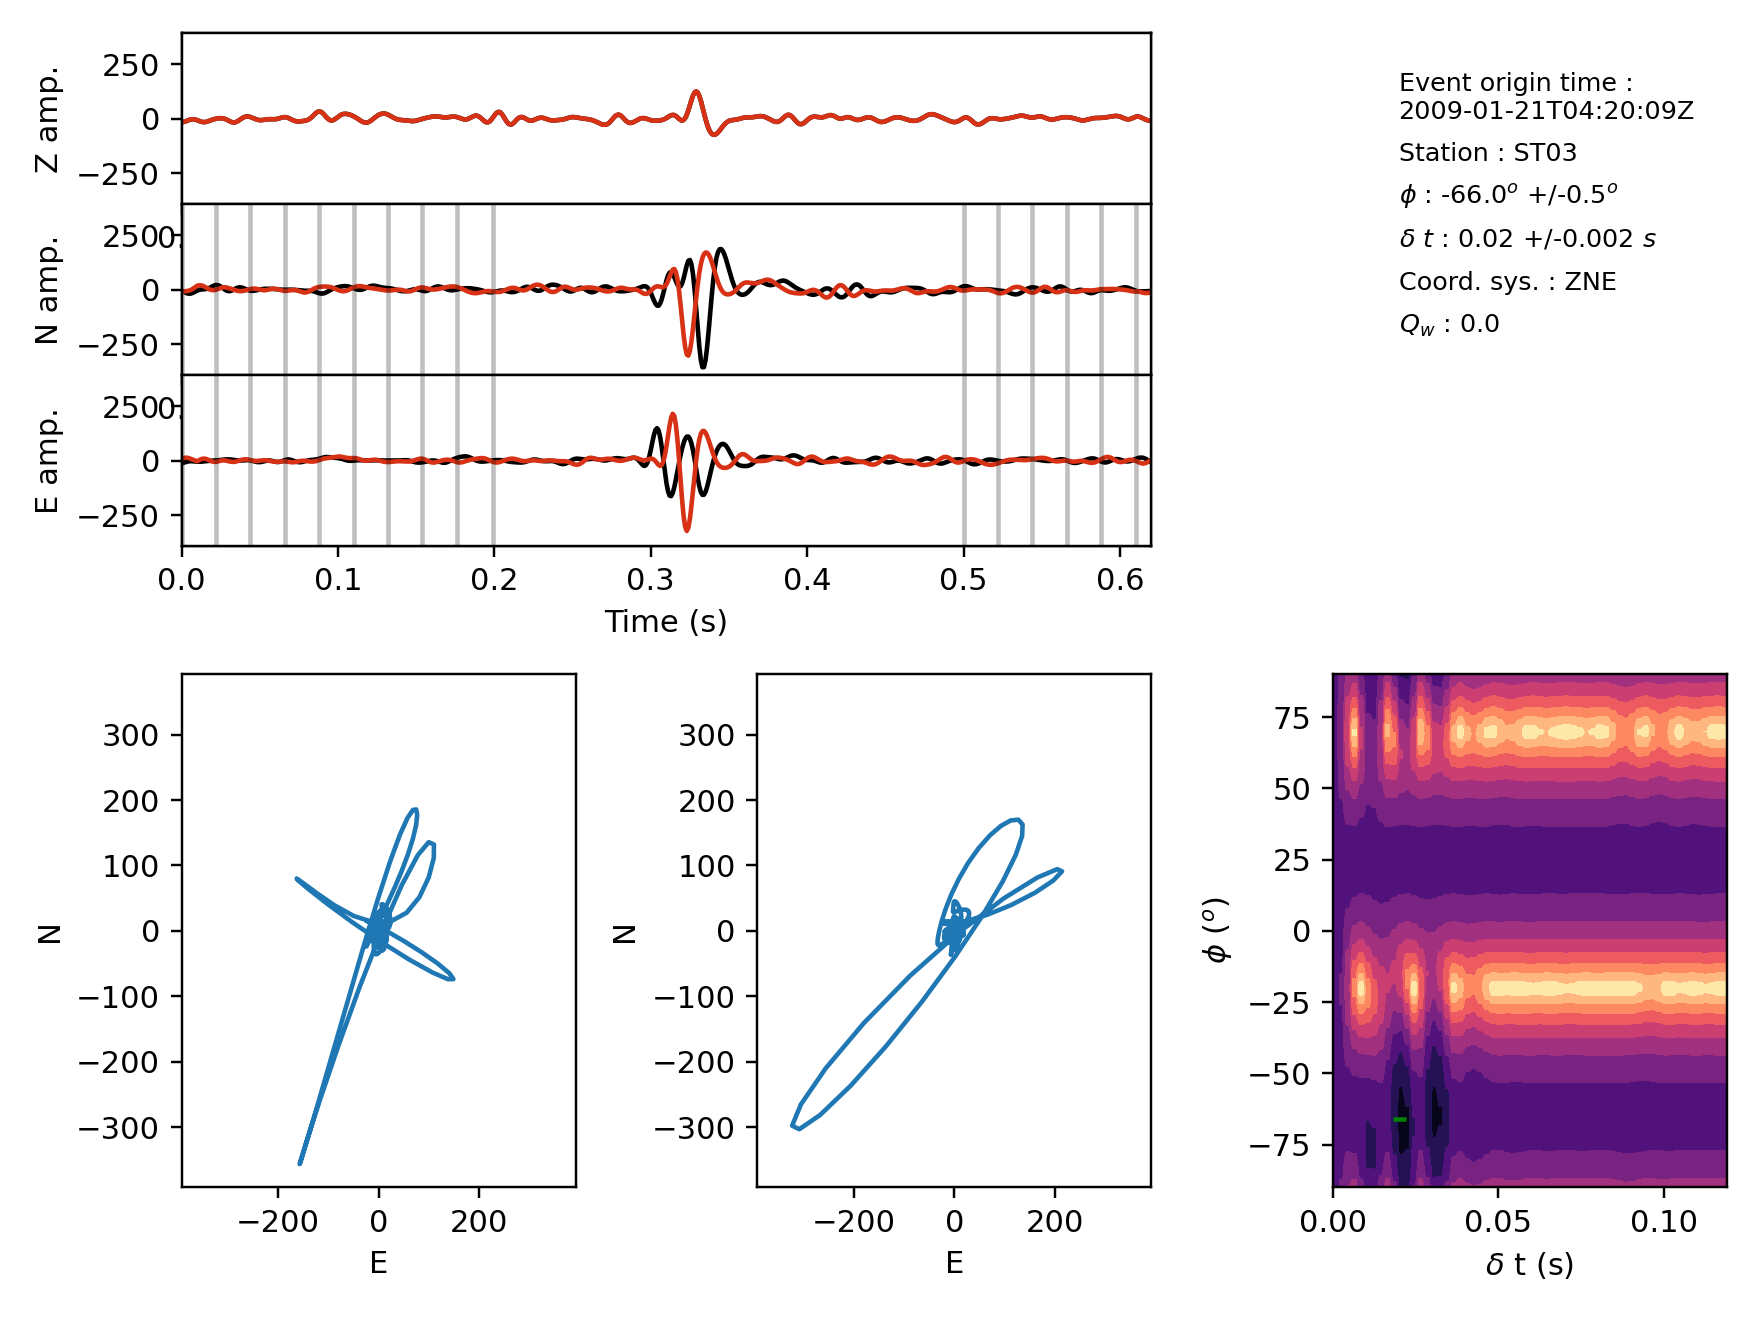

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:926: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if outdir:


<IPython.core.display.Javascript object>


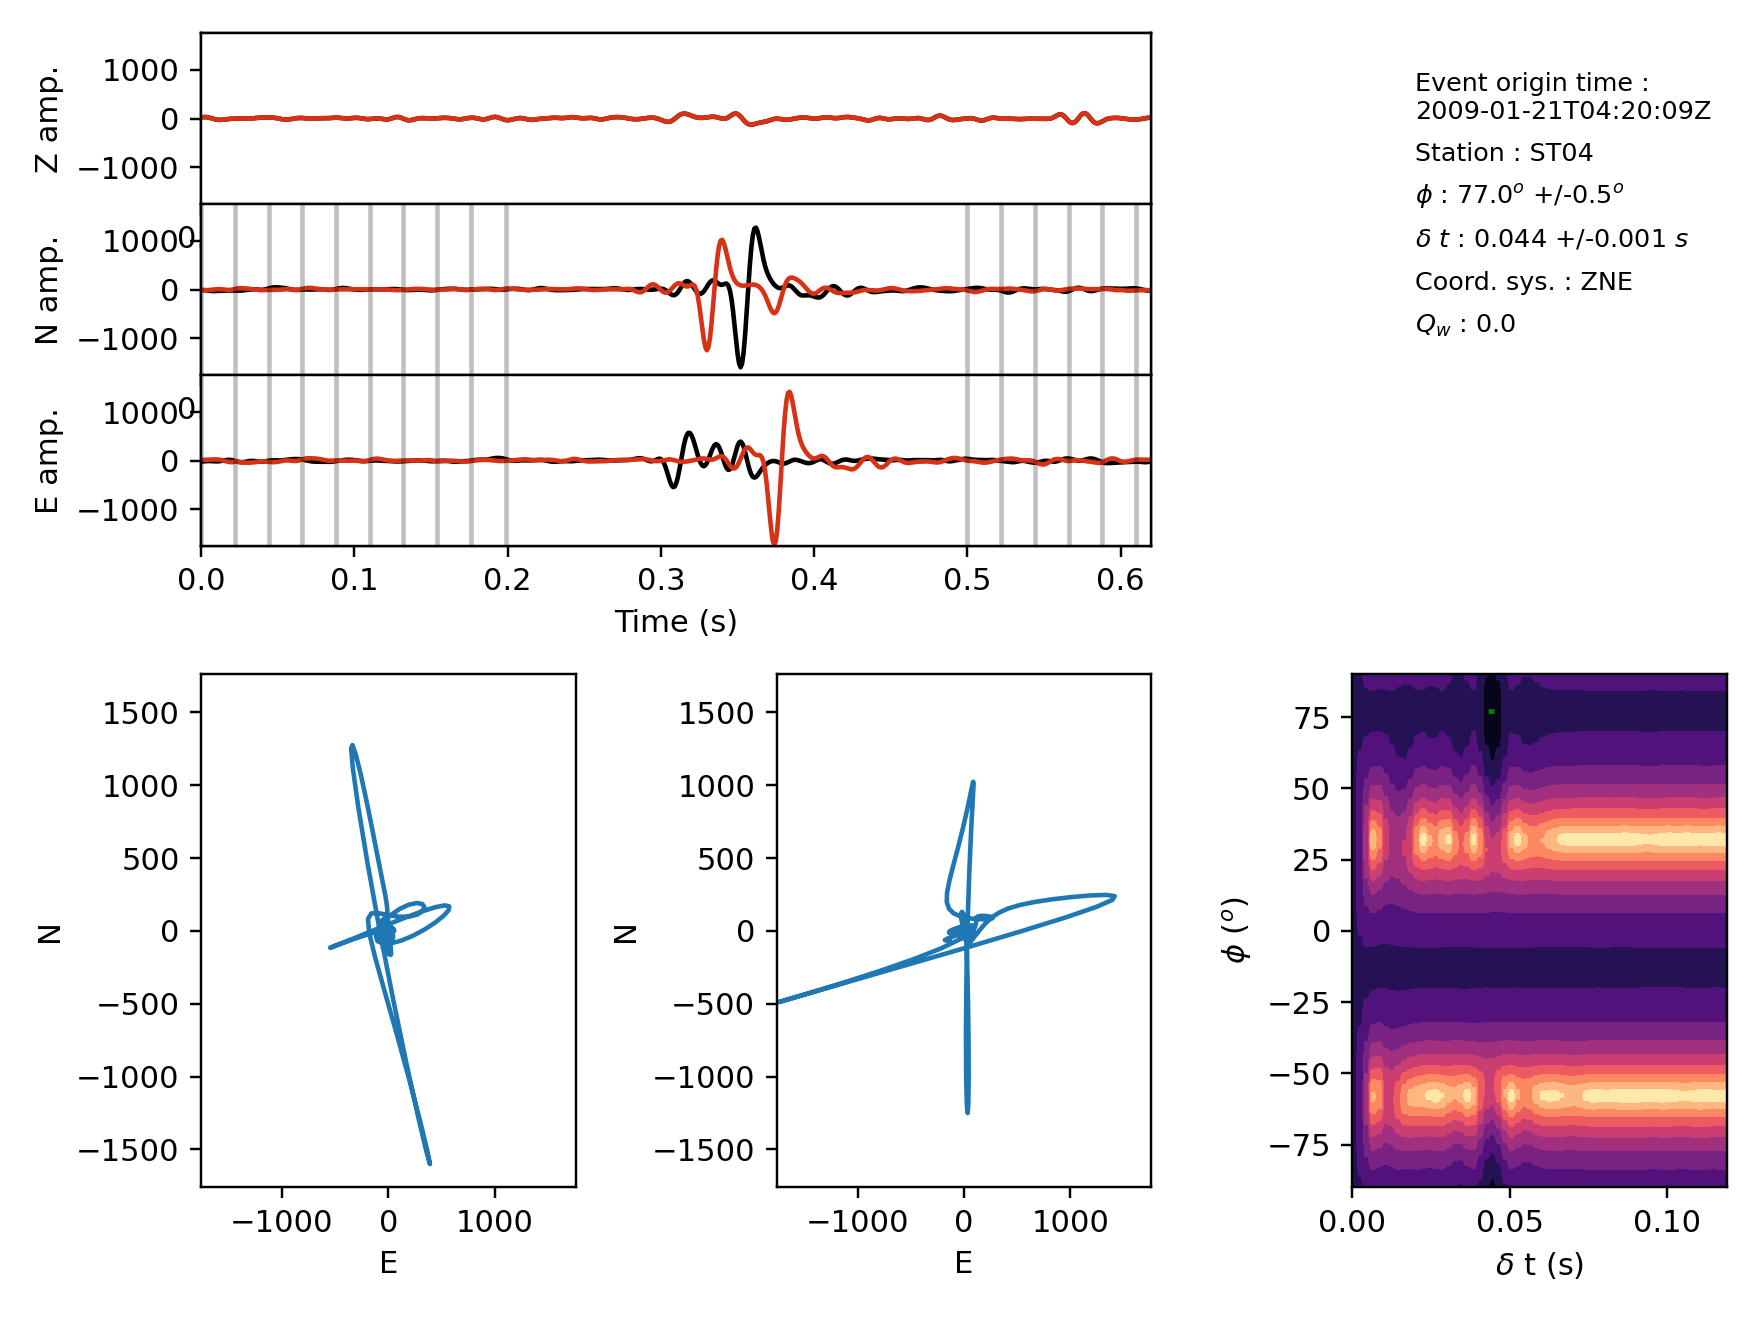

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:926: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if outdir:


<IPython.core.display.Javascript object>


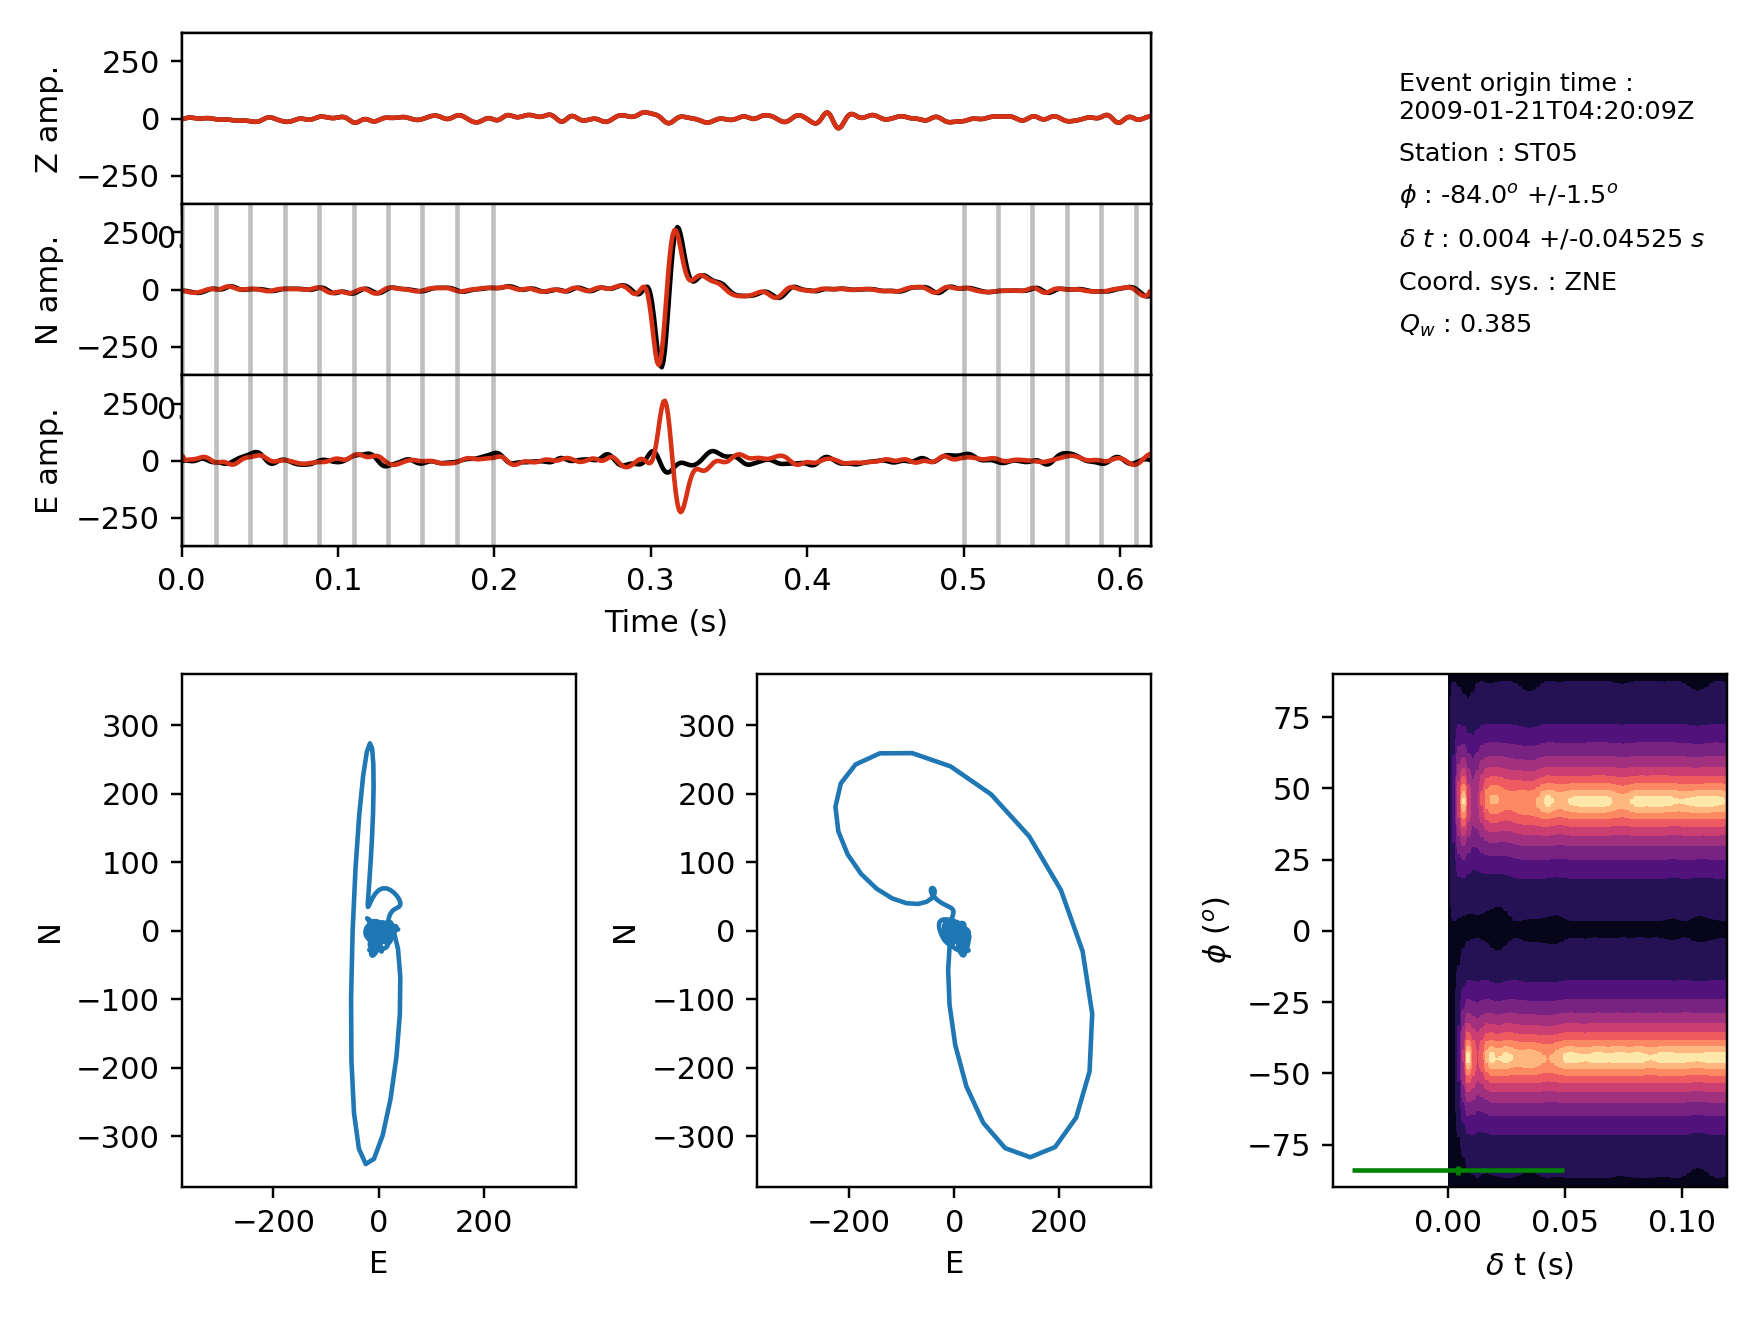

No S phase pick for station: ST06 therefore skipping this station.
No S phase pick for station: ST07 therefore skipping this station.
No S phase pick for station: ST08 therefore skipping this station.
No S phase pick for station: ST09 therefore skipping this station.
No S phase pick for station: ST10 therefore skipping this station.


/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:926: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if outdir:


In [10]:
splitting_event.plot()

In [7]:
# And save result to file:
splitting_event.save_result()


Saved sws result to: /Users/eart0504/Documents/python/github_repositories/swspy/examples/icequake_example/20090121042009_sws_result.csv
